<a href="https://colab.research.google.com/github/wideddhf/myrep/blob/main/TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

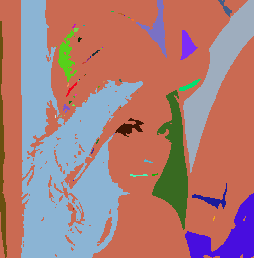

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow # Importing cv2_imsho
# Lecture image
img = cv.imread('/content/lena.PNG',cv.IMREAD_GRAYSCALE)
# seuillage image
thresh,imgbin=cv.threshold(img,0,255,cv.THRESH_OTSU+cv.THRESH_BINARY_INV)
# Application de la méthode 4 connexité
retval, labels, stats, centroids	=	cv.connectedComponentsWithStatsWithAlgorithm(	imgbin, 4, cv. CV_32S,cv.CCL_WU)
# définition de map de coleur
palette = np.random.rand(256,1,3)*256
palette = np.uint8(palette)
imgpf = labels & 0xFF
imgpf =  np.uint8(imgpf)
dst	=	cv.applyColorMap(	imgpf, palette)
# affichage du résultat
cv2_imshow(dst)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
#seuillage par ostu
def ostu(image):
 image1d=np.ravel(image)
 unique_values= np.unique(image1d)
 elements=[]
 nb_occurrences=[]
 for i in range(len(unique_values)):
  k=0
  for j in range(len(image1d)):
    if image1d[j]==unique_values[i]:
      k+=1
  elements.append(unique_values[i])
  nb_occurrences.append(k)
 variances=[]
 for i in range (len(elements)):
    th=elements[i]
    w0=sum(nb_occurrences[:i])/sum(nb_occurrences)
    w1=sum(nb_occurrences[i:])/sum(nb_occurrences)
    res0 = [a * b for a, b in zip(nb_occurrences[:i], elements[:i])]
    res1 = [a * b for a, b in zip(nb_occurrences[i:], elements[i:])]
    mu0=sum(res0)/sum(nb_occurrences)
    mu1=sum(res1)/sum(nb_occurrences)
    var=w0*w1*((mu0-mu1)**2)
    variances.append(var)
 th_final=elements[np.argmax(variances)]
 for i in range(len(image)):
    for j in range(len(image[0])):
      if image[i][j]<th_final:
        image[i][j]=0
      else:
        image[i][j]=255
 return image

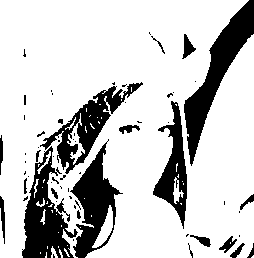

-1

In [ ]:
import cv2
img = cv2.imread('/content/lena.PNG',0)
image=ostu(img)
cv2_imshow(image)
cv2.waitKey(0)

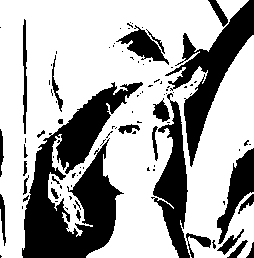

In [ ]:
#region_growing
import numpy as np
import cv2
import requests
from io import BytesIO

def region_growing(image, seed, threshold):
    rows, cols = image.shape
    segmented = np.zeros((rows, cols), dtype=np.uint8)
    segmented[seed] = 1
    seed_value = image[seed]

    def _get_neighbors(y, x):
        return [(y-1, x), (y+1, x), (y, x-1), (y, x+1)]

    stack = [seed]
    while stack:
        y, x = stack.pop()
        for yk, xk in _get_neighbors(y, x):
            if 0 <= yk < rows and 0 <= xk < cols:
                if segmented[yk, xk] == 0 and abs(int(image[yk, xk]) - int(seed_value)) <= threshold:
                    segmented[yk, xk] = 1
                    stack.append((yk, xk))

    return segmented


image = cv2.imread("/content/lena.PNG", cv2.IMREAD_GRAYSCALE)
seed = (150, 150)
threshold = 50
result = region_growing(image, seed, threshold)
cv2_imshow(result * 255)
cv2.waitKey(0)
cv2.destroyAllWindows()


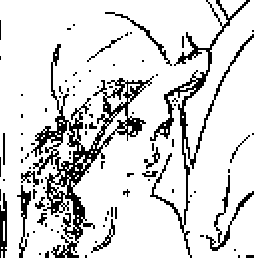

In [1]:
import requests
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def is_homogeneous(region, threshold):
    min_val, max_val = np.min(region), np.max(region)
    return (max_val - min_val) <= threshold
def recursive_split(region):
        rows, cols = region.shape
        if rows <= 1 or cols <= 1:
            return np.zeros_like(region, dtype=np.uint8)

        if is_homogeneous(region, threshold):
            return np.ones_like(region, dtype=np.uint8)

        # Split the region into four quadrants
        mid_row, mid_col = rows // 2, cols // 2

        # Ensure quadrants are correctly sized
        top_left = region[:mid_row, :mid_col]
        top_right = region[:mid_row, mid_col:]
        bottom_left = region[mid_row:, :mid_col]
        bottom_right = region[mid_row:, mid_col:]

        # Create empty segmented image of the same size
        segmented_quadrants = np.zeros_like(region, dtype=np.uint8)

        # Recursive splitting and assignment to segmented_quadrants
        segmented_quadrants[:mid_row, :mid_col] = recursive_split(top_left)
        segmented_quadrants[:mid_row, mid_col:] = recursive_split(top_right)
        segmented_quadrants[mid_row:, :mid_col] = recursive_split(bottom_left)
        segmented_quadrants[mid_row:, mid_col:] = recursive_split(bottom_right)

        return segmented_quadrants
def merge_regions(segmented):
   #Merge adjacent regions if they are similar
        # Placeholder function for merging adjacent regions if needed
        return segmented

    # Ensure the image is grayscale

threshold = 20
image = cv2.imread('/content/lena.PNG', cv2.IMREAD_GRAYSCALE)
if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the region splitting and merging algorithm
segmented_image = recursive_split(image)
segmented_image = merge_regions(segmented_image)
cv2_imshow(segmented_image* 255)
cv2.waitKey(0)
cv2.destroyAllWindows()